# Import Libraries and Data

## Import Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Import Data

In [9]:
# Creating a string of the path
# Define the path variable
path = r'/Users/douniaelyoussoufi/Climate Change Impact on Agriculture'
# Load the dataset file directly using os.path.join
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned.csv'))

# Data cleaning

In [7]:
df.columns

Index(['Unnamed: 0', 'year', 'country', 'region', 'crop_type',
       'average_temperature_c', 'total_precipitation_mm', 'co2_emissions_mt',
       'crop_yield_mt_per_ha', 'extreme_weather_events', 'irrigation_access_%',
       'pesticide_use_kg_per_ha', 'fertilizer_use_kg_per_ha',
       'soil_health_index', 'adaptation_strategies',
       'economic_impact_million_usd'],
      dtype='object')

In [9]:
# Drop the unnecessary columns
columns_to_drop = ['total_precipitation_mm', 'irrigation_access_%', 
                   'pesticide_use_kg_per_ha', 'fertilizer_use_kg_per_ha', 
                   'soil_health_index']
df.drop(columns=columns_to_drop, inplace=True)
# Check the remaining columns after the drop
df.columns

Index(['Unnamed: 0', 'year', 'country', 'region', 'crop_type',
       'average_temperature_c', 'co2_emissions_mt', 'crop_yield_mt_per_ha',
       'extreme_weather_events', 'adaptation_strategies',
       'economic_impact_million_usd'],
      dtype='object')

In [11]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                     0
year                           0
country                        0
region                         0
crop_type                      0
average_temperature_c          0
co2_emissions_mt               0
crop_yield_mt_per_ha           0
extreme_weather_events         0
adaptation_strategies          0
economic_impact_million_usd    0
dtype: int64

In [17]:
# Check the shape
df.shape

(10000, 11)

In [15]:
# Check for duplicates
dups = df.duplicated()
dups.shape

(10000,)

<Axes: xlabel='crop_yield_mt_per_ha', ylabel='Count'>

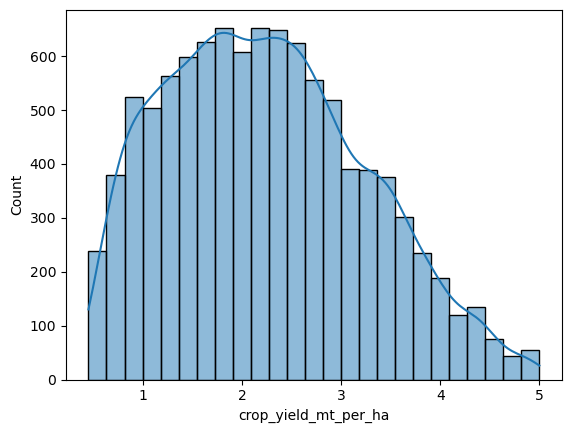

In [23]:
# Extreme values checks
sns.histplot(df['crop_yield_mt_per_ha'], bins=25, kde=True)

As the line and the bar align closely, it suggests there are no significant outliers in the data.

In [25]:
# Check the mean
df['crop_yield_mt_per_ha'].mean()

2.2400169

In [27]:
# Check the median
df['crop_yield_mt_per_ha'].median()

2.17

In [29]:
# Check the max
df['crop_yield_mt_per_ha'].max()

5.0

# Hypothesis

Increased crop yield per hectare significantly contributes to a higher economic impact in agricultural regions.

# Data preparation for regression analysis

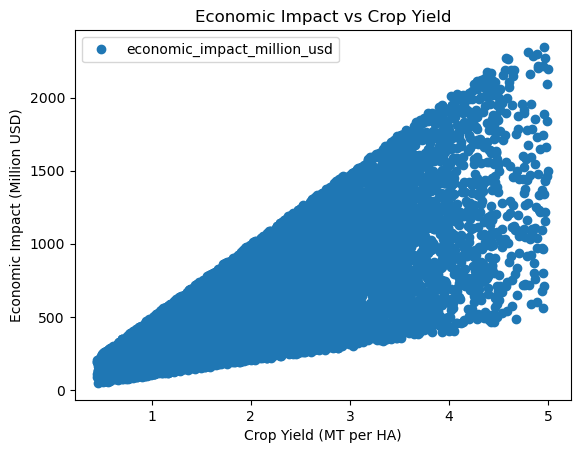

In [36]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x='crop_yield_mt_per_ha', y='economic_impact_million_usd', style='o')
plt.title('Economic Impact vs Crop Yield')  
plt.xlabel('Crop Yield (MT per HA)') 
plt.ylabel('Economic Impact (Million USD)')  
plt.show()

The scatterplot shows a strong correlation between crop yield and economic impact, with no apparent outliers.

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.
x = df['crop_yield_mt_per_ha'].values.reshape(-1,1)
y = df['economic_impact_million_usd'].values.reshape(-1,1)

In [15]:
# Show x
x

array([[1.737],
       [1.737],
       [1.719],
       ...,
       [1.161],
       [3.348],
       [3.71 ]])

In [17]:
# Show y
y

array([[ 808.13],
       [ 616.22],
       [ 796.96],
       ...,
       [ 155.99],
       [1613.9 ],
       [ 453.14]])

In [19]:
# Split data into a training set and a test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Regression analysis¶

In [22]:
# Create a regression object.
regression = LinearRegression()
#  Fit the regression model to the training set.
regression.fit(x_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using x.
y_predicted = regression.predict(x_test)

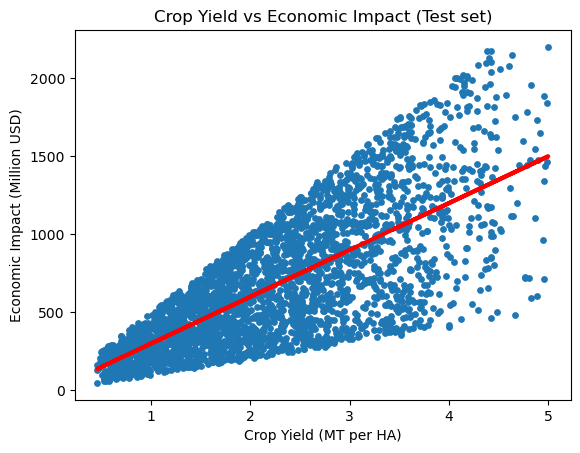

In [26]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(x_test, y_test, s=15)
plot_test.plot(x_test, y_predicted, color='red', linewidth=3)
plot_test.title('Crop Yield vs Economic Impact (Test set)')
plot_test.xlabel('Crop Yield (MT per HA)')
plot_test.ylabel('Economic Impact (Million USD)')
# Save the plot
plot_test.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'test_set'))
plot_test.show()

In [28]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [30]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[299.56818259]]
Mean squared error:  81657.84580112368
R2 score:  0.5321658802545597


In [32]:
y_predicted

array([[1032.84021683],
       [1078.67414877],
       [ 811.75889808],
       ...,
       [ 961.84255756],
       [ 906.1228756 ],
       [ 874.96778461]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,1332.88,1032.840217
1,392.21,1078.674149
2,802.45,811.758898
3,519.57,395.658692
4,228.03,497.511875
5,678.37,482.533465
6,298.39,242.878919
7,253.85,178.172192
8,668.07,503.503238
9,171.19,361.507920


As we can see from the table, the predicted values do not always match the actual values closely, indicating room for improvement in the model. This is expected, considering the moderate R² score and MSE.

In [37]:
# Predict.
y_predicted_train = regression.predict(x_train)
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [39]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[299.56818259]]
Mean squared error:  81010.76534282418
R2 score:  0.5253138369591681


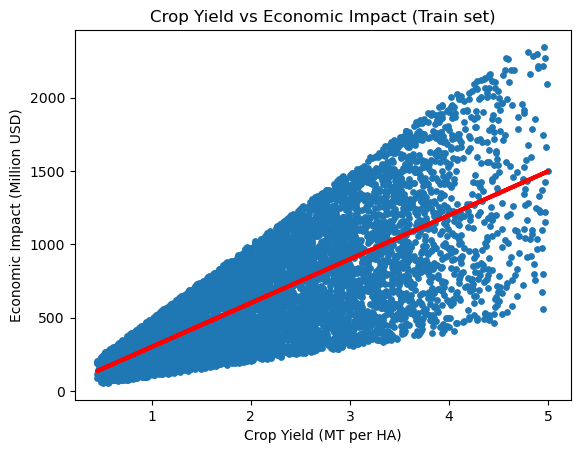

In [43]:
# Visualizing the training set results.
plot_train = plt
plot_train.scatter(x_train, y_train, s=15)
plot_train.plot(x_train, y_predicted_train, color='red', linewidth=3)
plot_train.title('Crop Yield vs Economic Impact (Train set)')
plot_train.xlabel('Crop Yield (MT per HA)')
plot_train.ylabel('Economic Impact (Million USD)')
# Save the plot
plot_test.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'train_set'))
plot_test.show()
plot_train.show()

# Model Performance on the Test Set

- The model's performance on the training set shows a **R² score** of 0.52, which is slightly lower than the test set's R² of 0.53. This indicates that the model explains around 52% of the variance in economic impact based on crop yield, but it still leaves significant room for improvement.
- The **mean squared error (MSE)** for the training set is 81010.77, which is comparable to the test set's MSE of 81657.85, suggesting that the model does not overfit and behaves similarly on both training and test sets.
- The **slope** of 299.57 again indicates that for each unit increase in crop yield (MT per HA), economic impact (Million USD) increases by approximately 299.57 units.

# Reflections on Data Bias

- Bias may arise if certain features, like crop yield or economic impact, are overrepresented or mismeasured, affecting the model's generalizability.
- The model’s moderate performance suggests other variables may influence economic impact, and adding or refining features could improve predictions.
- Ensuring a well-distributed dataset and checking for outliers or errors will reduce bias and enhance the model's robustness.